<img align="right" style="padding-left:50px;" src="figures_wk4/data_cleaning.png" width=350><br>
### User Bias in Data Cleaning
For your homework assignment this week, we will explore how our treatment of our data can impact the quality of our results.

**Dataset:**
The data is a Salary Survey from AskAManager.org. It’s US-centric-ish but does allow for a range of country inputs.

A list of the corresponding survey questions can be found [here](https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html).

 

In [1]:
import pandas as pd

In [18]:
df= pd.read_csv('survey_data.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28108 entries, 0 to 28107
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  28108 non-null  object 
 1   q1         28108 non-null  object 
 2   q2         28033 non-null  object 
 3   q3         28107 non-null  object 
 4   q4         7273 non-null   object 
 5   q5         28108 non-null  object 
 6   q6         20793 non-null  float64
 7   q7         28108 non-null  object 
 8   q8         211 non-null    object 
 9   q9         3047 non-null   object 
 10  q10        28108 non-null  object 
 11  q11        23074 non-null  object 
 12  q12        28026 non-null  object 
 13  q13        28108 non-null  object 
 14  q14        28108 non-null  object 
 15  q15        27885 non-null  object 
 16  q16        27937 non-null  object 
 17  q17        27931 non-null  object 
dtypes: float64(1), object(17)
memory usage: 3.9+ MB


In [20]:
df.head()

,timestamp,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


### Assignment
Your goal for this assignment is to observe how your data treatment during the cleaning process can skew or bias the dataset.

Before diving right in, stop and read through the questions associated with the dataset. As you can see, they are either free-form text entries or categorical selections. Knowing this, perform some exploratory data analysis (EDA) to investigate the "state" of the dataset.

[Add as many code cell below here as needs]


First, Lets rename the column name from the help of survey form and the provided dataset. The rename may not perfectly map the column as I did it for convention.

In [30]:
column_mapping = {
    'q1': 'Age',
    'q2': 'Industry',
    'q3': 'Job_Title',
    'q4': 'Job_Description',
    'q5': 'Salary',
    'q6': 'Monetary_compensation',
    'q7': 'Currency',
    'q8': 'Other_Currency',
    'q9': 'Other_income',
    'q10': 'Country',
    'q11': 'State',
    'q12': 'Location',
    'q13': 'Overall_experience',
    'q14':'Related_experience',
    'q15':'Degree',
    'q16':'Sex',
    'q17': 'Ethnicity'
}
df.rename(columns=column_mapping, inplace=True)


Lets start by checking the missing values of columns.

In [31]:
print(df.isnull().sum()[df.isnull().sum() > 0])

Industry                    75
Job_Title                    1
Job_Description          20835
Monetary_compensation     7315
Other_Currency           27897
Other_income             25061
State                     5034
Location                    82
Degree                     223
Sex                        171
Ethnicity                  177
dtype: int64


In [32]:
display(df.describe(include='all'))

,timestamp,Age,Industry,Job_Title,Job_Description,Salary,Monetary_compensation,Currency,Other_Currency,Other_income,Country,State,Location,Overall_experience,Related_experoence,Degree,Sex,Ethnicity
count,28108,28108,28033,28107,7273,28108,2.079300e+04,28108,211,3047,28108,23074,28026,28108,28108,27885,27937,27931
unique,25326,7,1220,14377,7010,4319,NaN,11,124,2983,382,137,4841,8,8,6,5,51
top,4/27/2021 11:05:08,25-34,Computing or Tech,Software Engineer,Fundraising,"60,000",NaN,USD,INR,Hourly,United States,California,Boston,11 - 20 years,11 - 20 years,College degree,Woman,White
freq,5,12668,4711,286,20,430,NaN,23410,11,4,9004,2611,772,9630,6542,13536,21389,23235
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.824460e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.336249e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lets, plot a heatmap to see the missing value pattern

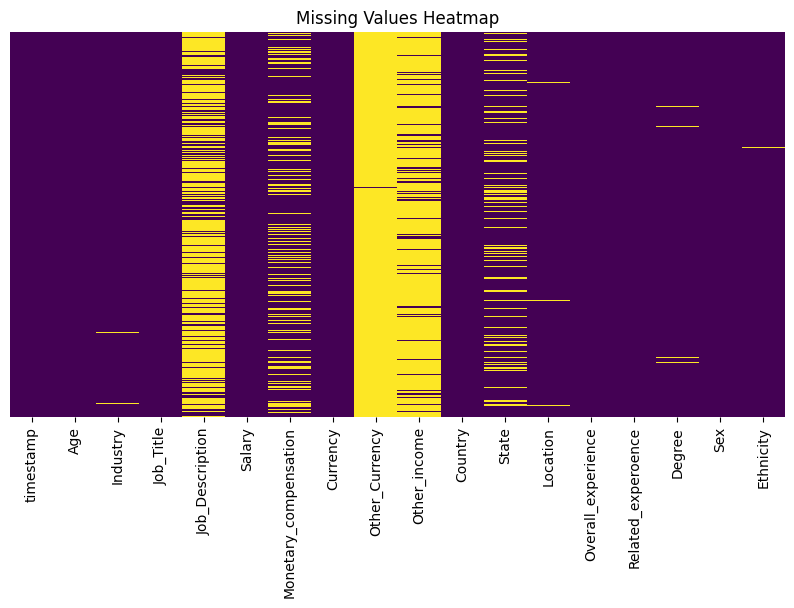

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [34]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Categorical Columns:", categorical_cols)
print("Numeric Columns:", numeric_cols)

Categorical Columns: ['timestamp', 'Age', 'Industry', 'Job_Title', 'Job_Description', 'Salary', 'Currency', 'Other_Currency', 'Other_income', 'Country', 'State', 'Location', 'Overall_experience', 'Related_experoence', 'Degree', 'Sex', 'Ethnicity']
Numeric Columns: ['Monetary_compensation']


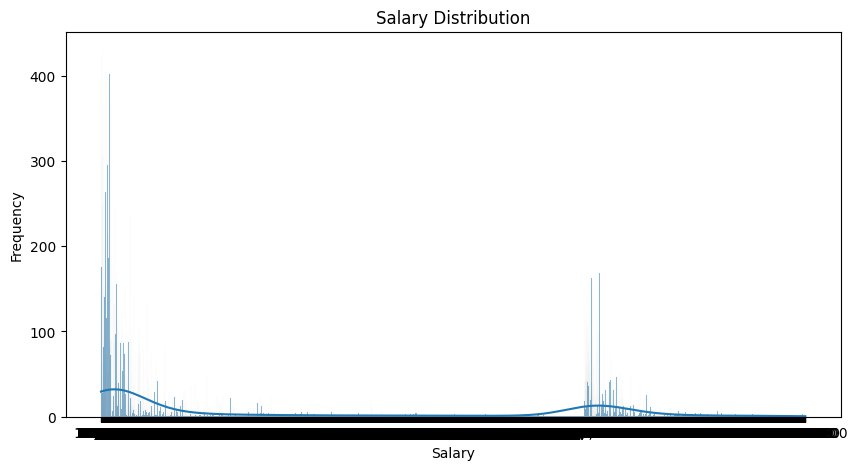

In [28]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Salary'].dropna(), bins=30, kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()


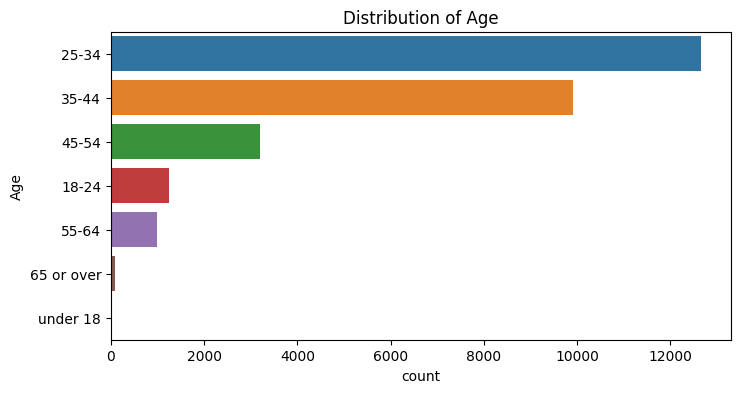

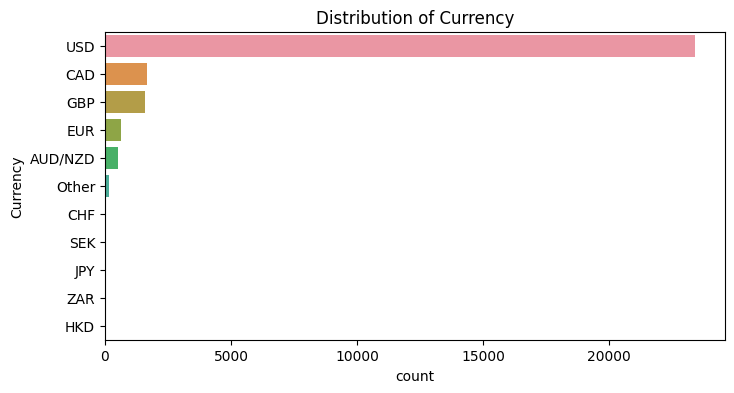

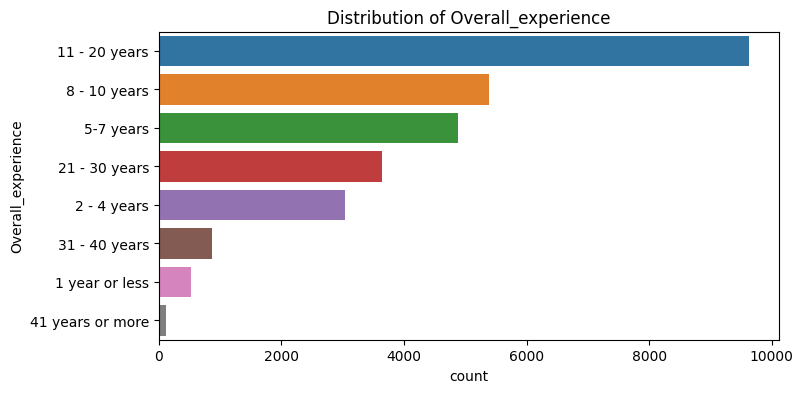

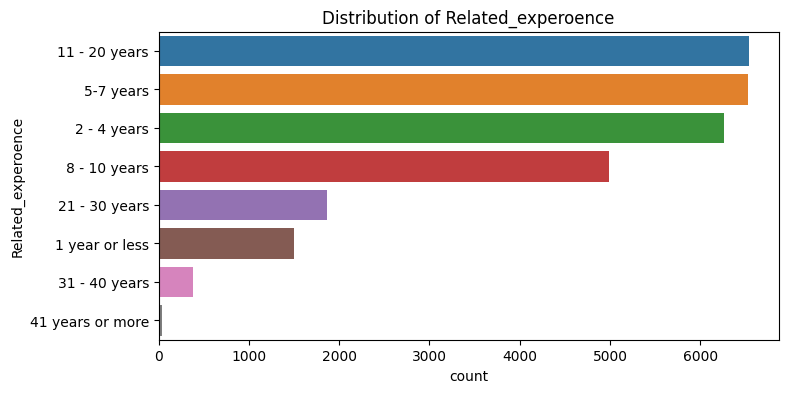

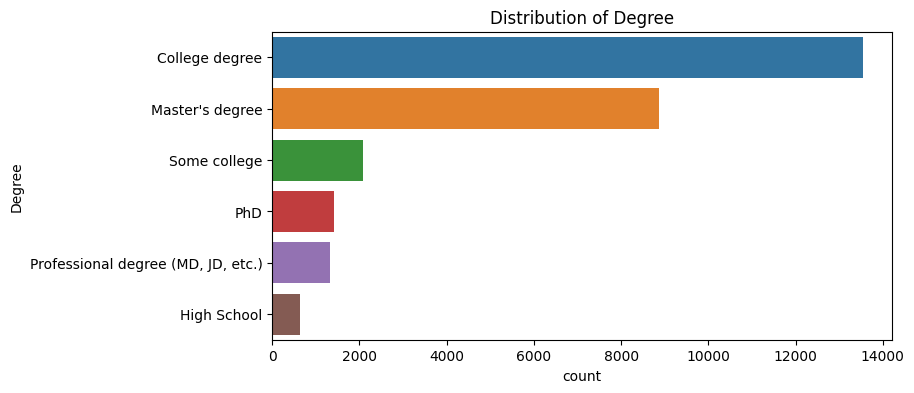

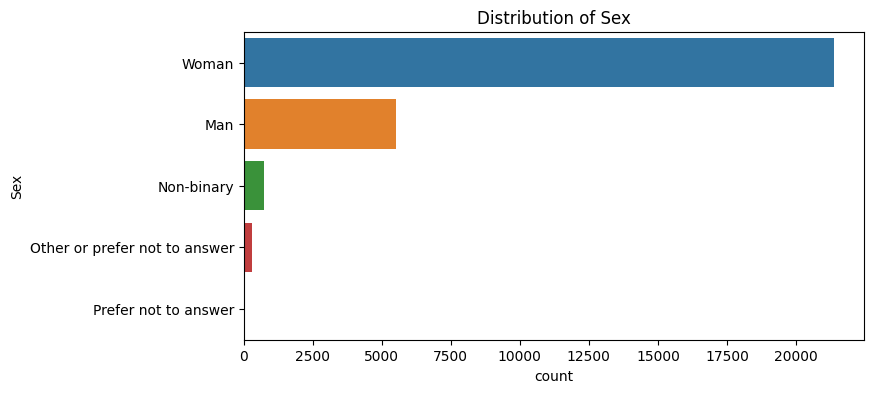

In [33]:
for col in ['Age', 'Currency', 'Overall_experience', 'Related_experoence', 'Degree', 'Sex']:  # Updated categorical variables
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()

Lets check for Outlier in Salary.

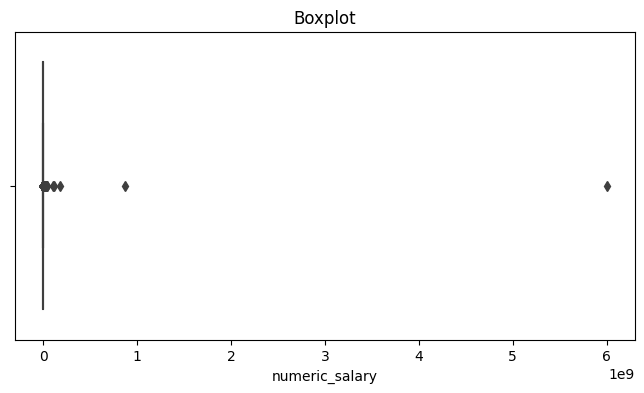

In [49]:
from scipy import stats
df['numeric_salary'] = df['Salary'].str.replace(',', '').astype(float)
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['numeric_salary'])  # Use x instead of y for horizontal orientation
plt.title(f"Boxplot")
plt.show()

c:\Users\Sanjeeb\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


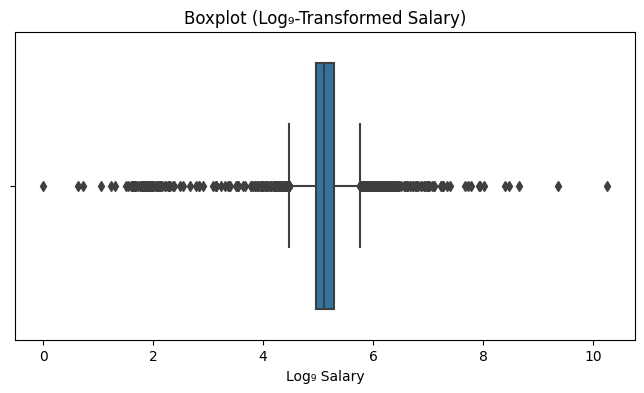

In [52]:
import numpy as np

df['log9_salary'] = np.log(df['numeric_salary']) / np.log(9)  # log base 9

# Plot boxplot with log9-transformed salary
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['log9_salary'])
plt.title("Boxplot (Log₉-Transformed Salary)")
plt.xlabel("Log₉ Salary")
plt.show()

Lets, try to see plot using different log functions

c:\Users\Sanjeeb\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Sanjeeb\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Sanjeeb\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


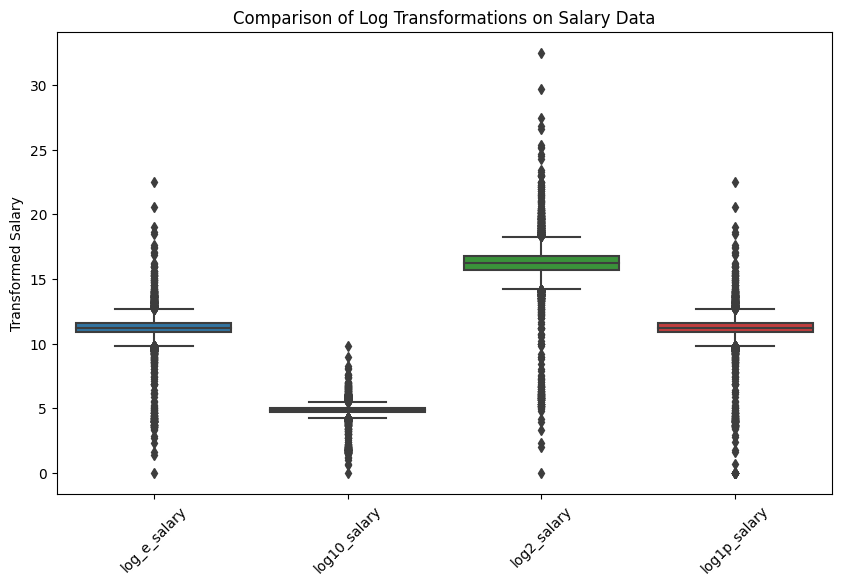

In [53]:
df['log_e_salary'] = np.log(df['numeric_salary'])  # Natural log
df['log10_salary'] = np.log10(df['numeric_salary'])  # Log base 10
df['log2_salary'] = np.log2(df['numeric_salary'])  # Log base 2
df['log1p_salary'] = np.log1p(df['numeric_salary'])  # log(1 + x) for stability

# Plot boxplots to compare transformations
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['log_e_salary', 'log10_salary', 'log2_salary', 'log1p_salary']])
plt.title("Comparison of Log Transformations on Salary Data")
plt.xticks(rotation=45)
plt.ylabel("Transformed Salary")
plt.show()

We can see there are large number of outlier in the Salary columns, and one of the major reason might be due to different currency. So either we need to accept all outliers or need to convert all salary in same currency.

**Question:** How would you describe the "state" of this dataset? Be specific and detailed in your answer. (Think paragraphs rather than sentences).

[Add you answer to this markdown cell]

From the above EDA, we can see the dataset content numeric, categorical and text data. Except from age range, experience duration, degree, and sex other columns had really more unique values. Also, from above analysis Other_currency, other_income, Job_Description have high missing value but they seems to be less informative.  State have 5034 missing values which might be because of the people from different country. After that Degree have highest missing value followed by Ethnicity, sex, Location and Industry although must of them are from categorical options. 
For this dataset, removing columns that have missing values more that 70% would be great as they do not contain much information that may biased an outcomes. Also after analyzing columns datatype, only one column Monetary_compensation is numeric and other are object. But we can convert, Salary into numeric as well by removing commas from its value. Also, it will be best if all salary are converted to same currency.

Also, from above charts, we can see most of the people in this dataset has work experience of 11-12 years and had college degree. Also, we can see number of men is almost one fourth to the number of women that may effect on the outcomes of men. Age range seems to be normally distributed.

We need to fill missing value in this dataset and some datatype conversion are required. Also we can standardize some categorical data like country to make US, USA and United States as same. And, at last another potential step might be seeing for outliers. 

#### The Plan

Now, it is time to plan how you will clean up the dataset. You **are not** allowed to use any machine learning technique to clean the data. (No SMOTE! No machine learning! Or anything like that!)

**Question:** Based on your EDA above, detail how you would clean up this dataset. 
Things to consider: (This is not an exhaustive list)
- Are there columns that can't be effectively cleaned? If so, why?
- Are there columns that genuinely won't have a data value?
- Does it make sense to segment the dataset based on specific columns when determining how to handle the missing values?
- Are outliers a factor in this dataset?

Remember preserving as much of the data as possible is the goal. That means dropping rows with a missing value somewhere might not be the best idea.

[Add you answer to this markdown cell]

## Data Cleaning Plan
We can remove columns like other_currency, other_income, job_description. Since most of the value are missing and it do not contain much important data. But, other_currency could be used to replace a value "other" in currency to convert the salary into usd or any other currency which will help us to eliminate or handle outlier in salary column that may arise due to different currency value. 

For other column like salary we can use median by converting it to numeric value to fill the missing value. Also, we can use job_title and country or Currency to segment data for better median value of salary to make missing value more accurate.

In case of some categorical data, we can use either mode value or assign "unknown" to fill the missing value. Using "unknown" may preserve the representation of data more than using the mode value in this case.


From above chart of salary, we can see there is large number of outlier, but lets not remove that because it might be because of different value of currency. So, we may need to convert all salary in same currency to find real outliers.

Also, there are large number of missing value in State column, which we may fill on the based of country and location or assign unknown.



#### Implementation

Based on the plan the you described above, go ahead and clean up the dataset.

[Add as many code cell below here as needs]

In [54]:
df_cleaned = df

FIrstly, lets fill the "Other" value of Column Currency by the value present in Other_Currency column, so that we can remove Other_Currency column.

In [55]:
df_cleaned['Currency'] = df_cleaned.apply(
    lambda row: row['Other_Currency'] if row['Currency'] == 'Other' and pd.notna(row['Other_Currency']) else row['Currency'], 
    axis=1
)

In [87]:
df_cleaned['Currency'].unique()

array(['USD', 'GBP', 'CAD', 'EUR', 'AUD/NZD', 'INR', 'Peso Argentino',
       'CHF', 'MYR', 'ZAR', 'SEK', 'HKD', 'NOK', 'BR$', 'Dkk', 'TTD',
       'Indian rupees', 'BRL (R$)', 'Mexican pesos', 'CZK', 'DKK', 'Bdt',
       'American Dollars', 'Php', 'PLN (Polish zloty)', 'czech crowns',
       'TRY', 'Norwegian kroner (NOK)', 'CNY', 'ILS/NIS', 'Other',
       'US Dollar', 'BRL', 'NIS (new Israeli shekel)',
       'RMB (chinese yuan)', 'AUD', 'JPY', 'Taiwanese dollars',
       'Philippine Peso', 'SGD', 'KRW (Korean Won)', 'Czk', 'THB', 'IDR ',
       'Sgd', 'Nok', 'NZD', 'ILS (Shekel)', 'DKK ', 'China RMB',
       'AUD Australian ', 'LKR', 'Polish Złoty', 'Philippine peso (PHP)',
       'Australian Dollars ', 'PHP', 'Equity', 'ARS',
       'Argentinian peso (ARS)', 'Israeli Shekels', 'ILS', 'MXN',
       'PhP (Philippine Peso)', 'PLN', 'KRW', 'SAR', 'RM', 'IDR',
       'Argentine Peso', 'Philippine Pesos', 'Ils', 'INR (Indian Rupee)',
       'NTD', 'Danish Kroner', 'Korean Won ', 'dkk', 

Since, the Salary column contains the figure including comma, so lets convert it to numeric form.

In [67]:
df_cleaned['Salary'] = df_cleaned['Salary'].astype(str).str.replace(r'[^\d.]', '', regex=True).astype(float)

# Display updated dataset
display(df_cleaned[['Salary']].head())

,Salary
0,55000.0
1,54600.0
2,34000.0
3,62000.0
4,60000.0


In [91]:
# I did this part thinking salary has missing value
# Since, there are ni missing value in salary so this part is not useful
def fill_salary(row):
    if pd.isna(row['Salary']):  
        median_salary = df_cleaned.groupby(['Job_Title','Currency'])['Salary'].median()
        return median_salary.get((row['Job_Title'], row['Currency']), df_cleaned['Salary'].median())  # Fallback to overall median
    else:
        return row['Salary']

df_cleaned['Salary'] = df_cleaned.apply(fill_salary, axis=1)

display(df_cleaned[['Job_Title','Currency', 'Salary']].head())

,Job_Title,Currency,Salary
0,Research and Instruction Librarian,USD,55000.0
1,Change & Internal Communications Manager,GBP,54600.0
2,Marketing Specialist,USD,34000.0
3,Program Manager,USD,62000.0
4,Accounting Manager,USD,60000.0


In [69]:
df_cleaned.isnull().sum()

timestamp                    0
Age                          0
Industry                    75
Job_Title                    1
Job_Description          20835
Salary                       0
Monetary_compensation     7315
Currency                     0
Other_Currency           27897
Other_income             25061
Country                      0
State                     5034
Location                    82
Overall_experience           0
Related_experoence           0
Degree                     223
Sex                        171
Ethnicity                  177
numeric_salary               0
z_score                      0
log_salary                   0
log9_salary                  0
log_e_salary                 0
log10_salary                 0
log2_salary                  0
log1p_salary                 0
dtype: int64

Lets cleans the columns that are less informative and had extreme missing value. Lets remove colums "Other_Currency", "Other_income", "Job_Description" and other columns that were added during EDA process and now not useful.

In [71]:
df_cleaned = df_cleaned.drop(columns=['Other_Currency', 'Other_income', 'Job_Description','numeric_salary','z_score','log_salary','log9_salary','log_e_salary','log10_salary','log2_salary','log1p_salary'])


In [73]:
df_cleaned['State'] = df_cleaned['State'].fillna('unknown')
df_cleaned['Location'] = df_cleaned['Location'].fillna('unknown')
df_cleaned['Degree'] = df_cleaned['Degree'].fillna('unknown')
df_cleaned['Sex'] = df_cleaned['Sex'].fillna('unknown')
df_cleaned['Ethnicity'] = df_cleaned['Ethnicity'].fillna('unknown')
df_cleaned['Monetary_compensation'] = df_cleaned['Monetary_compensation'].fillna(0)

# Check the updated DataFrame
print(df_cleaned.head())

            timestamp    Age                       Industry   
0  4/27/2021 11:02:10  25-34   Education (Higher Education)  \
1  4/27/2021 11:02:22  25-34              Computing or Tech   
2  4/27/2021 11:02:38  25-34  Accounting, Banking & Finance   
3  4/27/2021 11:02:41  25-34                     Nonprofits   
4  4/27/2021 11:02:42  25-34  Accounting, Banking & Finance   

                                  Job_Title   Salary  Monetary_compensation   
0        Research and Instruction Librarian  55000.0                    0.0  \
1  Change & Internal Communications Manager  54600.0                 4000.0   
2                      Marketing Specialist  34000.0                    0.0   
3                           Program Manager  62000.0                 3000.0   
4                        Accounting Manager  60000.0                 7000.0   

  Currency         Country           State     Location Overall_experience   
0      USD   United States   Massachusetts       Boston          5-7

In [74]:
df_cleaned.isnull().sum()


timestamp                 0
Age                       0
Industry                 75
Job_Title                 1
Salary                    0
Monetary_compensation     0
Currency                  0
Country                   0
State                     0
Location                  0
Overall_experience        0
Related_experoence        0
Degree                    0
Sex                       0
Ethnicity                 0
dtype: int64

In [88]:
df_cleaned['Industry'] = df_cleaned['Industry'].fillna('unknown')
df_cleaned['Job_Title'] = df_cleaned['Job_Title'].fillna('unknown')


In [89]:
df_cleaned.isnull().sum()


timestamp                0
Age                      0
Industry                 0
Job_Title                0
Salary                   0
Monetary_compensation    0
Currency                 0
Country                  0
State                    0
Location                 0
Overall_experience       0
Related_experoence       0
Degree                   0
Sex                      0
Ethnicity                0
dtype: int64

In [83]:
df['Country'].nunique()

232

In [80]:
import pycountry

def standardize_country_name(country_name):
    try:
        country = pycountry.countries.get(name=country_name)
        if country:
            return country.name
        else:
            return country_name  
    except:
        return country_name

df_cleaned['Country'] = df_cleaned['Country'].apply(standardize_country_name)

# Check the updated DataFrame
print(df_cleaned['Country'].unique())


['United States' 'United Kingdom' 'Canada' 'Netherlands' 'Australia'
 'Spain' 'Finland' 'France' 'Germany' 'Ireland' 'India' 'Argentina'
 'united state' 'u.s.a' 'Denmark' 'Switzerland' 'Bermuda'
 'the united states' 'Malaysia' 'Mexico' 'South Africa' 'Belgium' 'Sweden'
 'Hong Kong' 'Kuwait' 'Norway' 'Sri Lanka' 'Unknown'
 'usa-- virgin islands' 'england/uk' 'u.s'
 "we don't get raises, we get quarterly bonuses, but they periodically asses income in the area you work, so i got a raise because a 3rd party assessment showed i was paid too little for the area we were located"
 'unites states' 'england, uk.' 'Greece' 'Japan' 'u. s.' 'Austria'
 'Brazil' 'united states of american' 'united kingdom (england)'
 'worldwide (based in us but short term trips aroudn the world)' 'Hungary'
 'Luxembourg' 'united sates of america'
 'united states (i work from home and my clients are all over the us/canada/pr'
 'Colombia' 'unted states' 'united statesp' 'united stattes'
 'united statea' 'united kingdom.

In [92]:
df['Country'].value_counts()

Country
United States      23064
Canada              1682
United Kingdom       927
united kingdom       634
Australia            389
                   ...  
united kingdomk        1
cuba                   1
australi               1
cote d'ivoire          1
Tanzania               1
Name: count, Length: 232, dtype: int64

In [93]:
import re

# Mapping dictionary to standardize known variations
country_mapping = {
    'usa': 'United States',
    'u.s.a': 'United States',
    'united state': 'United States',
    'united states of america': 'United States',
    'us': 'United States',
    'u.s': 'United States',
    'united statesp': 'United States',
    'united stattes': 'United States',
    'united statea': 'United States',
    'united states of american': 'United States',
    'united states of americas': 'United States',
    'united states (i work from home and my clients are all over the us/canada/pr': 'United States',
    'us of a': 'United States',
    'united kindom': 'United Kingdom',
    'united kingdom': 'United Kingdom',
    'uk': 'United Kingdom',
    'england/uk': 'United Kingdom',
    'england, uk': 'United Kingdom',
    'england, united kingdom': 'United Kingdom',
    'the united kingdom': 'United Kingdom',
    'united kingdom (england)': 'United Kingdom',
    'united kingdomk': 'United Kingdom',
    'united kingdom.': 'United Kingdom',
    'can': 'Canada',
    'canada and usa': 'United States',
    'canada': 'Canada',
    'canad': 'Canada',
    'canada, but i work for a company in the us': 'Canada',
    'canda': 'Canada',
    'brazil': 'Brazil',
    'brasil': 'Brazil',
    'mexico': 'Mexico',
    'south africa': 'South Africa',
    'india': 'India',
    'germany': 'Germany',
    'france': 'France',
    'spain': 'Spain',
    'italy': 'Italy',
    'australia': 'Australia',
    'australian': 'Australia',
    'new zealand': 'New Zealand',
    'nz': 'New Zealand',
    'argentina': 'Argentina',
    'belgium': 'Belgium',
    'sweden': 'Sweden',
    'switzerland': 'Switzerland',
    'netherlands': 'Netherlands',
    'denmark': 'Denmark',
    'hong kong': 'Hong Kong',
    'singapore': 'Singapore',
    'japan': 'Japan',
    'china': 'China',
    'south korea': 'South Korea',
    'northern ireland': 'United Kingdom',
    'qatar': 'Qatar',
    'luxembourg': 'Luxembourg',
    'malta': 'Malta',
    'romania': 'Romania',
    'bulgaria': 'Bulgaria',
    'greece': 'Greece',
    'hungary': 'Hungary',
    'portugal': 'Portugal',
    'slovakia': 'Slovakia',
    'czech republic': 'Czech Republic',
    'czechia': 'Czech Republic',
    'latvia': 'Latvia',
    'slovenia': 'Slovenia',
    'ukraine': 'Ukraine',
    'tanzania': 'Tanzania',
    'kenya': 'Kenya',
    'jordan': 'Jordan',
    'afghanistan': 'Afghanistan',
    'morocco': 'Morocco',
    'israel': 'Israel',
    'uganda': 'Uganda',
    'eritrea': 'Eritrea',
    'ghana': 'Ghana',
    'congo': 'Congo',
    'myanmar': 'Myanmar',
    'venezuela': 'Venezuela',
    'zimbabwe': 'Zimbabwe',
    'panamá': 'Panama',
    'belgium': 'Belgium',
    'austria': 'Austria',
    'australia': 'Australia',
    'africa': 'Africa',
    'singapore': 'Singapore',
    'worldwide': 'United States',
    'unknown': 'Unknown',
    'international': 'International',
}

# Function to standardize country names based on the dictionary and regex
def standardize_country_name(country_name):
    country_name = country_name.lower()
    
    # First, apply the mapping dictionary
    if country_name in country_mapping:
        return country_mapping[country_name]
    
    # Apply regex for other common patterns
    if re.match(r'(u\.*s\.*a|us|united\s*states)', country_name):
        return 'United States'
    elif re.match(r'(uk|united\s*kingdom|england)', country_name):
        return 'United Kingdom'
    elif re.match(r'(canada)', country_name):
        return 'Canada'
    elif re.match(r'(brazil|brasil)', country_name):
        return 'Brazil'
    elif re.match(r'(mexico)', country_name):
        return 'Mexico'
    # Add more patterns if needed
    return country_name  # Return original if no match

# Apply the function to standardize the 'Country' column
df_cleaned['Country'] = df_cleaned['Country'].apply(standardize_country_name)

# Check the updated DataFrame
print(df_cleaned['Country'].unique())


['United States' 'United Kingdom' 'Canada' 'Netherlands' 'Australia'
 'Spain' 'finland' 'France' 'Germany' 'ireland' 'India' 'Argentina'
 'Denmark' 'Switzerland' 'bermuda' 'the united states' 'malaysia' 'Mexico'
 'South Africa' 'Belgium' 'Sweden' 'Hong Kong' 'kuwait' 'norway'
 'sri lanka' 'Unknown'
 "we don't get raises, we get quarterly bonuses, but they periodically asses income in the area you work, so i got a raise because a 3rd party assessment showed i was paid too little for the area we were located"
 'unites states' 'Greece' 'Japan' 'u. s.' 'Austria' 'Brazil'
 'worldwide (based in us but short term trips aroudn the world)' 'Hungary'
 'Luxembourg' 'united sates of america' 'colombia' 'unted states'
 'New Zealand' 'trinidad and tobago' 'united statees' 'cayman islands'
 'i am located in canada but i work for a company in the us'
 'uniyed states' 'uniyes states' 'u.a.' 'Czech Republic' 'Latvia'
 'puerto rico' 'rwanda' 'united arab emirates' 'bangladesh' 'Romania'
 'united status' 

In [94]:
df_cleaned['Country'].nunique()

184

In [95]:
df['Country'].value_counts()

Country
United States      23064
Canada              1682
United Kingdom       927
united kingdom       634
Australia            389
                   ...  
united kingdomk        1
cuba                   1
australi               1
cote d'ivoire          1
Tanzania               1
Name: count, Length: 232, dtype: int64

#### Reflection
Write a short reflection (400-500 words) answering the following: 
- What were the biggest issues you encountered in the messy dataset?
- How did cleaning the dataset improve its usability for machine learning?
- What would happen if we trained a model on the messy dataset vs. the cleaned one?
- Do you feel you skewed or biased the dataset while cleaning it?

[Add you answer to this markdown cell]


A few of the major problems in this dataset are the missing values, misaligned data modes, and variations in representation. For example, the job description, other_income, and other_currency columns had over 70% missing values and contained very little useful information. Missing values in these columns added unnecessary complexity without providing much value, so the decision to delete them was an important one.

Another major problem was inconsistences in the country names used. The USA had many alternatives, US, U.S.A., United States, and America, with many others containing typos in several country names. Standardization in this case would have been for their uniformity. Similarly, the state field was also missing in many entries, making location-based analysis difficult. Since the dataset had multiple countries, establishing what state would apply in situations where the city or location was used posed a challenge. Although some states could be filled in by taking location information into account, in many cases, it would have been appropriate to mark the entry as “Unknown” rather than speculate, preserving data integrity.

Salary inconsistencies were another challenge. The salaries were actually recorded in different currencies in the dataset. If there are different currencies represented, it's impossible to confidently compare salaries - this will depend on currency values. Although I have not yet converted all salaries to a singular currency but this will be part of my plan to rectify the data so that future analysis can be easier and better.

The cleaned dataset was made much more usable for machine learning. Removing all the columns that should have been dropped, performing imputation for the missing values, and standardizing country and location data, the dataset acquired much more structure and became easier to analyze. Although the salary standardization remains incomplete, the other cleaning has provided more consistency of the dataset.

If one were to train a machine learning model using the dirty dataset, the outputs would have been wildly wrong. Country names with different spellings, or states that were missing, could lead into misleading geographical analysis, while deviations in salary with different currencies could skew trends. A model would most certainly not be able to pick out any useful patterns, as the dataset was initially prepped. The cleaning process, however, ordered and coalesced the dataset far more tightly toward analyzability and prediction.

While cleaning up, I was especially careful to avoid skewing and biasing the dataset. I thought it's very important to preserve the original data as much as possible to increase consistency. For example, if I didn't know what a missing state was, I did not assume it to be any state but rather put an "Unknown" tag to avoid any bias. Likewise, where there wasn't any compensation, I did not put any arbitrary number; it was maintained as zero. Such decisions kept the dataset as fair and unbiased as possible.

To summarize, while some more cleaning remains like converting currency for the salaries-the dataset has come a long way toward being clean. By reducing inconsistencies and standardizing values, I've made it far more suitable for machine learning and for an analysis leading to insights and results one can trust.

## Deliverables
Upload your Jupyter Notebook to your GitHub repo and then provide a link to that repo in Worlclass. 